In [16]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

# Original dataset
dat = pd.read_csv('NewData.csv')

# Not considering the comlumn with value 0 and 1
numeric_columns = dat.select_dtypes(include='number').columns
exclude_columns = ['Sr.No.' ,'AP Classes?', 'Dual Enrollment?', 'Offers Sports?']
numeric_columns_to_scale = [col for col in numeric_columns if col not in exclude_columns]

# MinMaxScaler
scaler = MinMaxScaler()

# converting it between 0 and 1
dat[numeric_columns_to_scale] = scaler.fit_transform(dat[numeric_columns_to_scale])

# Saved the cleaned and transformed dataset to a new CSV file
dat.to_csv('Final_dataset.csv', index=False)

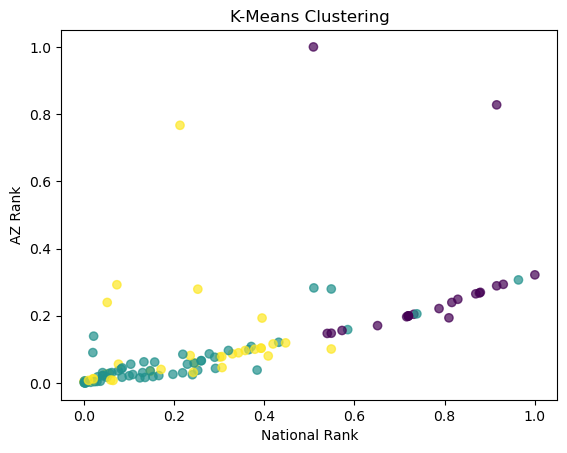

In [17]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Load your cleaned and transformed dataset
dat = pd.read_csv('Final_dataset.csv')

# Extract the features you want to use for clustering
features_for_clustering = ['National Rank', 'AZ Rank', 'Racial%-White', 'Racial%-Black', 'Racial%-Native', 'Racial%-Hispanic', 'Racial%-Asian', 'Racial%-Other']
data_for_clustering = dat[features_for_clustering]

# number of clusters
num_clusters = 3

kmeans = KMeans(n_clusters=num_clusters, random_state=42)

clusters = kmeans.fit_predict(data_for_clustering)
dat['Cluster'] = clusters

# Graph
plt.scatter(dat['National Rank'], dat['AZ Rank'], c=dat['Cluster'], cmap='viridis', alpha=0.7)
plt.title('K-Means Clustering')
plt.xlabel('National Rank')
plt.ylabel('AZ Rank')
plt.show()

# NewData set
dat.to_csv('Clustering_model.csv', index=False)